In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import config
import gym
from agents.DQN import DQN
from networks.standard_network import standardNN
from networks.basic_network import basicNN
import gym
from typing import Union
import numpy as np
from environments.easy import easy_env
from agents.DQN_RS import DQN_RS
from collections import Counter

In [47]:
bj_config = config.config['BLACKJACK']
max_games = 50000
bj_config["hyperparameters"]["max_games"] = max_games
bj_config["hyperparameters"]["lr"] = 5e-4
bj_config["hyperparameters"]["alpha"] = 0.1
bj_config["hyperparameters"]["mini_batch_size"] = 8
bj_config["hyperparameters"]["buffer_size"] = 80
bj_config["hyperparameters"]["min_epsilon"] = 0.25
bj_config["hyperparameters"]["games_to_decay_epsilon_for"] = max_games * 3 // 4

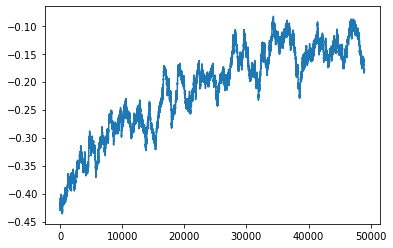

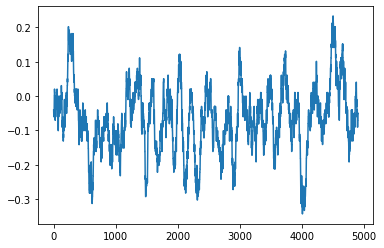

Action counts {0: 4205, 1: 3372}
Mean reward -0.06581316263252651


In [48]:
agent = DQN(bj_config)
agent.play_games(verbose=True)
agent.evaluation_mode = True
agent.play_games(5000, verbose=True)
agent.evaluation_mode = False

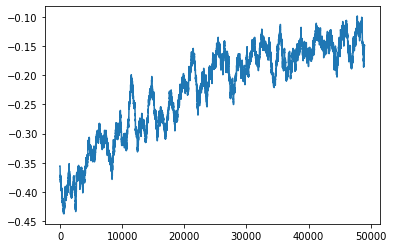

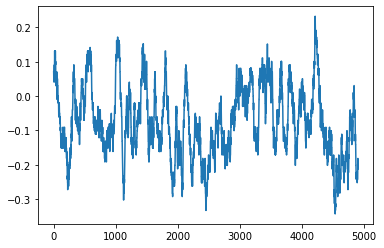

Action counts {0: 4855, 1: 1733}
Mean reward -0.07641528305661133


In [49]:
agent = DQN_RS(bj_config)
agent.play_games(verbose=True)
agent.evaluation_mode = True
agent.play_games(5000, verbose=True)
agent.evaluation_mode = False